<a href="https://colab.research.google.com/github/Martin-Msb/context-aware-recommendation/blob/main/context_aware_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This research notebook is part of DAMI II course at DSV - HT2022

### Authors: © 2022 Martin Masaba & Edda Waciira

# Dowload H&M dataset from Kaggle

Install Kaggle library

In [1]:
!pip install kaggle

     |████████████████████████████████| 58 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 1.9 MB/s eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=17294f5708dfbbf71d196a8ae02cd99a9d6f7c89c57ca95d926c42a2ebfa880b
  Stored in directory: /home/marmas6/.cache/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle


In [6]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

Download dataset

In [8]:
!kaggle competitions download -c h-and-m-personalized-fashion-recommendations

100%|█████████████████████████████████████▉| 28.7G/28.7G [08:24<00:00, 63.3MB/s]
100%|██████████████████████████████████████| 28.7G/28.7G [08:24<00:00, 61.1MB/s]


Unzip data into working dir

In [ ]:
!unzip h-and-m-personalized-fashion-recommendations

In [16]:
#Import libraries
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import os
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

#No normal distribution in age column
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

### Data Preprocesing

In [74]:
customers_df = pd.read_csv('customers.csv')

In [75]:
customers_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [76]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [77]:
customers_df.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [78]:
member_status = pd.DataFrame(customers_df['club_member_status'].value_counts()/customers_df['club_member_status'].shape[0] * 100)
member_status

,club_member_status
ACTIVE,92.748509
PRE-CREATE,6.775609
LEFT CLUB,0.034038


'pre-create' and 'left-club' seems to be very small groups, so we can drop the rows

In [79]:
customers_df.drop(customers_df.index[customers_df['club_member_status'] != 'ACTIVE'], inplace=True)

customers_df.club_member_status.value_counts()

ACTIVE    1272491
Name: club_member_status, dtype: int64

In [80]:
customers_df.fashion_news_frequency.value_counts()

NONE         788482
Regularly    471304
Monthly         778
None              2
Name: fashion_news_frequency, dtype: int64

In [81]:
customers_df['fashion_news_frequency'].replace('None', np.nan, inplace=True)

In [82]:
customers_df.fashion_news_frequency.value_counts()

NONE         788482
Regularly    471304
Monthly         778
Name: fashion_news_frequency, dtype: int64

In [83]:
customers_df.fashion_news_frequency.unique()

array(['NONE', 'Regularly', nan, 'Monthly'], dtype=object)

In [84]:
customers_df = customers_df.dropna(subset =['fashion_news_frequency'])

In [85]:
customers_df.fashion_news_frequency.unique()

array(['NONE', 'Regularly', 'Monthly'], dtype=object)

In [86]:
customers_df.isnull().sum()

customer_id                    0
FN                        789740
Active                    802113
club_member_status             0
fashion_news_frequency         0
age                         6168
postal_code                    0
dtype: int64

In [87]:
avg_age = customers_df.age.mean()
max_age = customers_df.age.max()
min_age = customers_df.age.min()

print('The average age is {}, the max age is {} and the min age is {}'
      .format(avg_age, max_age, min_age))

The average age is 36.067268231084924, the max age is 99.0 and the min age is 16.0


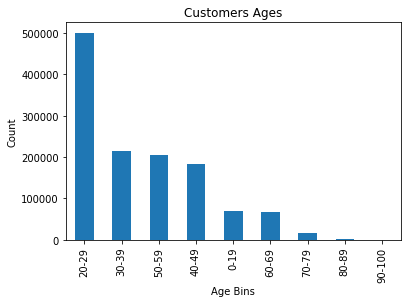

In [88]:
bins = 0, 19, 29, 39, 49, 59, 69, 79,89,100
customers_df['age_bins'] = pd.cut(customers_df.age, bins, labels = ['0-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-100'])


customers_df.age_bins.value_counts().plot(kind = 'bar', title = 'Customers Ages', xlabel = 'Age Bins', ylabel= 'Count')

In [89]:
#Should drop some ages here
age_bins = pd.DataFrame(customers_df['age_bins'].value_counts()/customers_df['age_bins'].shape[0] * 100)
age_bins

,age_bins
20-29,39.701991
30-39,16.920045
50-59,16.194259
40-49,14.584027
0-19,5.516975
60-69,5.223059
70-79,1.264117
80-89,0.099797
90-100,0.006426


In [90]:
customers_df = customers_df.drop(customers_df[(customers_df['age'] >= 50) | (customers_df['age'] <= 20)].index)

In [91]:
customers_df.age_bins.value_counts()

20-29     447303
30-39     213288
40-49     183841
0-19           0
50-59          0
60-69          0
70-79          0
80-89          0
90-100         0
Name: age_bins, dtype: int64

In [92]:
#drop unnecessary columns
customers_df.drop(['age_bins', 'postal_code'], axis = 1, inplace =True)
customers_df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0
10,0000945f66de1a11d9447609b8b41b1bc987ba185a5496...,NaN,NaN,ACTIVE,NONE,29.0
...,...,...,...,...,...,...
1371973,ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae...,1.0,1.0,ACTIVE,Regularly,22.0
1371974,ffffaff3905b803d1c7e153a1378a5151e1f34f236ba54...,1.0,1.0,ACTIVE,Regularly,21.0
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0


In [93]:
customers_df.isnull().sum()

customer_id                    0
FN                        547750
Active                    556125
club_member_status             0
fashion_news_frequency         0
age                         6168
dtype: int64

According to the owner of the dataset, 'FN' is if a customer get Fashion News newsletter, 'Active' is if the customer is active for communication.
See more [here](https://www.kaggle.com/c/h-and-m-personalized-fashion-recommendations/discussion/307001)

As such, the value 1.0 in these two columns can be interpreted as 'true' and as such, np.nan can be intepreted as 'false'.

Therefore, these values can be replaced with 0

In [94]:
customers_df['FN'] = customers_df['FN'].fillna(0)
customers_df['Active'] = customers_df['Active'].fillna(0)

In [95]:
customers_df.FN.value_counts()

0.0    547750
1.0    302850
Name: FN, dtype: int64

In [96]:
customers_df.Active.value_counts()

0.0    556125
1.0    294475
Name: Active, dtype: int64

In [97]:
customers_df.isnull().sum()

customer_id                  0
FN                           0
Active                       0
club_member_status           0
fashion_news_frequency       0
age                       6168
dtype: int64

Only the 'age' has nan values now and since they are not many, it is possible to drop these rows

In [98]:
customers_df = customers_df.dropna(subset =['age'])

In [99]:
customers_df.isnull().sum()

customer_id               0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    0
age                       0
dtype: int64

**Scaling numeric columns**

There are three numerical columns (FN, Active & age). But FN and Active have 1 and 0 values representing truth or false.

As such, only age should be scaled. Below we check the dristribution of age so as to decide the best sclaing method to use.

In [100]:
customers_df['age'].describe()

count    844432.000000
mean         31.333135
std           8.536422
min          21.000000
25%          24.000000
50%          29.000000
75%          37.000000
max          49.000000
Name: age, dtype: float64

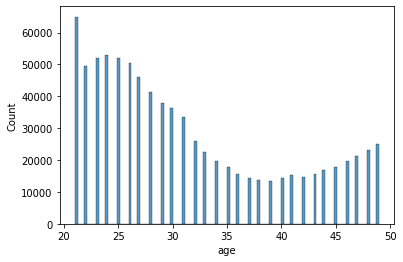

In [101]:
sns.histplot(customers_df['age'])

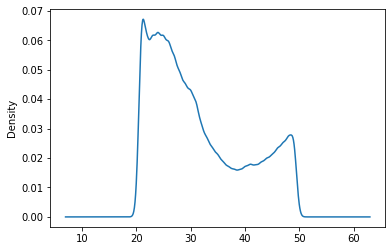

In [102]:
customers_df['age'].plot(kind='kde')

In [104]:
scaler = MinMaxScaler()

In [105]:
age_col = customers_df[['age']]

age_col.shape

(844432, 1)

In [107]:
scaler.fit(age_col)
age_scaled = scaler.transform(age_col)

In [108]:
age_scaled.shape

(844432, 1)

In [109]:
customers_df = customers_df.assign(age_scaled=age_scaled)

In [110]:
customers_df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,age_scaled
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,1.000000
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,0.142857
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,0.107143
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0,0.392857
10,0000945f66de1a11d9447609b8b41b1bc987ba185a5496...,0.0,0.0,ACTIVE,NONE,29.0,0.285714
...,...,...,...,...,...,...,...
1371973,ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae...,1.0,1.0,ACTIVE,Regularly,22.0,0.035714
1371974,ffffaff3905b803d1c7e153a1378a5151e1f34f236ba54...,1.0,1.0,ACTIVE,Regularly,21.0,0.000000
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,ACTIVE,NONE,24.0,0.107143
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,ACTIVE,NONE,21.0,0.000000


In [111]:
categorical_cols = ['club_member_status', 'fashion_news_frequency']

In [112]:
categorical_cols

['club_member_status', 'fashion_news_frequency']

**Enconding Categorical Columns**

In [113]:
customers_df[categorical_cols].nunique()

club_member_status        1
fashion_news_frequency    3
dtype: int64

In [115]:
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [116]:
encoder.fit(customers_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [117]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['club_member_status_ACTIVE', 'fashion_news_frequency_Monthly', 'fashion_news_frequency_NONE', 'fashion_news_frequency_Regularly']


In [118]:
customers_df[encoded_cols] = encoder.transform(customers_df[categorical_cols])

In [119]:
customers_df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,age_scaled,club_member_status_ACTIVE,fashion_news_frequency_Monthly,fashion_news_frequency_NONE,fashion_news_frequency_Regularly
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,1.000000,1.0,0.0,1.0,0.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,0.142857,1.0,0.0,1.0,0.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,0.107143,1.0,0.0,1.0,0.0
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0,0.392857,1.0,0.0,0.0,1.0
10,0000945f66de1a11d9447609b8b41b1bc987ba185a5496...,0.0,0.0,ACTIVE,NONE,29.0,0.285714,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1371973,ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae...,1.0,1.0,ACTIVE,Regularly,22.0,0.035714,1.0,0.0,0.0,1.0
1371974,ffffaff3905b803d1c7e153a1378a5151e1f34f236ba54...,1.0,1.0,ACTIVE,Regularly,21.0,0.000000,1.0,0.0,0.0,1.0
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,ACTIVE,NONE,24.0,0.107143,1.0,0.0,1.0,0.0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,ACTIVE,NONE,21.0,0.000000,1.0,0.0,1.0,0.0


In [120]:
customers_num_df = customers_df[['FN', 'Active','age_scaled','fashion_news_frequency_Monthly','fashion_news_frequency_NONE','fashion_news_frequency_Regularly']]

In [121]:
customers_num_df.corr()

,FN,Active,age_scaled,fashion_news_frequency_Monthly,fashion_news_frequency_NONE,fashion_news_frequency_Regularly
FN,1.000000,0.978589,0.018760,0.032688,-0.994511,0.993181
Active,0.978589,1.000000,0.020216,0.031154,-0.974137,0.972880
age_scaled,0.018760,0.020216,1.000000,0.004650,-0.018578,0.018341
fashion_news_frequency_Monthly,0.032688,0.031154,0.004650,1.000000,-0.033770,-0.018852
fashion_news_frequency_NONE,-0.994511,-0.974137,-0.018578,-0.033770,1.000000,-0.998615
fashion_news_frequency_Regularly,0.993181,0.972880,0.018341,-0.018852,-0.998615,1.000000


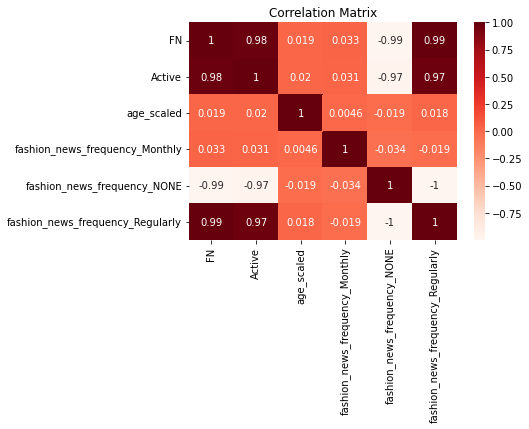

In [122]:
sns.heatmap(customers_num_df.corr(), cmap ='Reds', annot = True)
plt.title('Correlation Matrix');

In [28]:
train_df = pd.read_csv('transactions_train.csv')

In [29]:
train_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [ ]:
#Transaction Train
#Models to evaluate
#image data

In [123]:
articles_df = pd.read_csv('articles.csv')

In [124]:
articles_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [125]:
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [126]:
articles_df.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

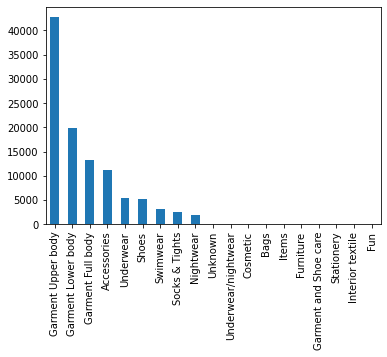

In [127]:
articles_df.product_group_name.value_counts().plot(kind = 'bar')

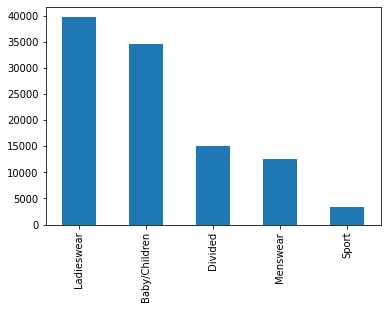

In [128]:
articles_df.index_group_name.value_counts().plot(kind = 'bar')

In [35]:
os.getcwd()

'/content'

In [36]:
images_root = r'/content/images'

In [37]:
#Returns dir, sub-dirs & image file paths
root_dirs = []
sub_dirs = []
image_files = []

for roots, sub_dir, files in os.walk(images_root):
  for file in files:
    if file.endswith(".jpg"):
      root_dirs.append(roots)
      sub_dirs.append(os.path.join(roots, file))
      image_files.append(file)

In [38]:
image_files[0:10]

['0290022001.jpg',
 '0293433029.jpg',
 '0291333013.jpg',
 '0293510002.jpg',
 '0294008056.jpg',
 '0296366034.jpg',
 '0296476014.jpg',
 '0291338032.jpg',
 '0291338023.jpg',
 '0293244001.jpg']

In [39]:
counter = 0
for item in image_files:
 counter+=1
print('The number of images in the images folder are:', counter)

The number of images in the images folder are: 105100


# Methods

1. Content Based Filtering

In [48]:
#Multiple purchases of same item
product_rating = train_df.groupby(['article_id'])['price'].count().reset_index(name='rating')

2. Collaborative Filtering

- Item-based CF
- User-based CF




In [49]:
product_rating

,article_id,rating
0,108775015,10841
1,108775044,7250
2,108775051,215
3,110065001,1044
4,110065002,539
...,...,...
104542,952267001,41
104543,952938001,9
104544,953450001,17
104545,953763001,35
